In [1]:
from diagnostics import *
%matplotlib inline

In [2]:
# get data
self = loadpickle('Results/TOIsensitivity27vettv2_mult2_planet00026_iteration012/Sensitivity_class')

Stellar parameters:
Tmag     = 9.094
Ms       = 0.585
Rs       = 0.530
Teff     = 3767
sig_phot = 158.6 ppm

2 injected planets:
P  [days] = 1.894, 5.643
rp        = 1.45, 0.85
rp/Rs     = 0.02501, 0.01469
(rp/Rs)^2 = 625.554138, 215.940434 ppm
detected  = 0, 0

0 false positives:
P [days] = 


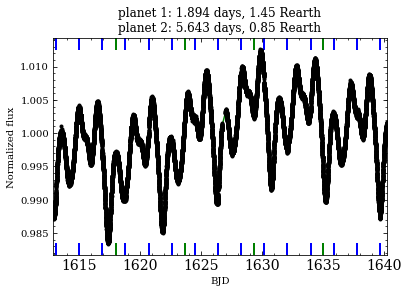

In [3]:
#
plot_raw_LC(self)

Stellar parameters:
Tmag     = 9.094
Ms       = 0.585
Rs       = 0.530
Teff     = 3767
sig_phot = 158.6 ppm

2 injected planets:
P  [days] = 1.894, 5.643
rp        = 1.45, 0.85
rp/Rs     = 0.02501, 0.01469
(rp/Rs)^2 = 625.554138, 215.940434 ppm
detected  = 0, 0

0 false positives:
P [days] = 


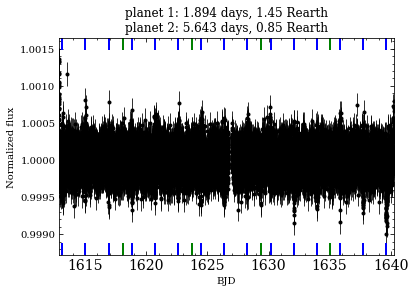

In [4]:
#
plot_corrected_LC(self)

Stellar parameters:
Tmag     = 9.094
Ms       = 0.585
Rs       = 0.530
Teff     = 3767
sig_phot = 158.6 ppm

2 injected planets:
P  [days] = 1.894, 5.643
rp        = 1.45, 0.85
rp/Rs     = 0.02501, 0.01469
(rp/Rs)^2 = 625.554138, 215.940434 ppm
detected  = 0, 0

0 false positives:
P [days] = 


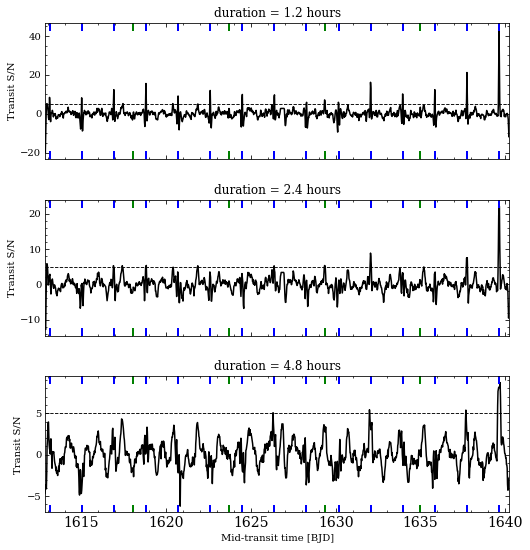

In [5]:
#
plot_transit_search(self)

In [6]:
#
report_failed_planet_candidates(self)

Period = 1.894 days
is median flux in-transit significantly deeper than out of transit?
False
is transit depth S/N greater than the required threshold?
False

Period = 8.890 days
is median flux in-transit significantly deeper than out of transit?
False
is transit depth S/N greater than the required threshold?
False

Period = 17.356 days
is median flux in-transit significantly deeper than out of transit?
False
is transit depth S/N greater than the required threshold?
False

Period = 19.250 days
is median flux in-transit significantly deeper than out of transit?
True
is transit depth S/N greater than the required threshold?
False

Period = 22.211 days
is median flux in-transit significantly deeper than out of transit?
True
is transit depth S/N greater than the required threshold?
False



In [6]:
#
check_confirm_transits(self, 3, 3, .5)

Confirming proposed transits...
0.0


ValueError: need more than 4 values to unpack

In [ ]:
i = 4
plot_phased_LC(self, self.params_guess[i,0], self.params_guess[i,1])

In [ ]:
self.params_true[:,0]*3

In [ ]:
# test FP identification technique
i=4
P,T0,_,dur = self.params_guess[i]
phase = foldAt(self.bjd, P, T0)
phase[phase>.5]-=1
intransit = (phase*P >= -dur/2) & (phase*P <= dur/2)

plt.plot(phase, self.fcorr,'.', phase[intransit], self.fcorr[intransit], '.')
plt.xlim((-.05,.05))

plt.figure()
y,x=np.histogram(self.fcorr[intransit], bins=30)
x = x[1:]-np.diff(x)[0]/2
plt.plot(x, y)
plt.axvline(x.mean())

print y[x<x.mean()].sum()/float(y.sum())

realplanet = True if y[x<x.mean()].sum()/float(y.sum()) >= .5 else False
print 'isplanet?', realplanet